<a href="https://colab.research.google.com/github/TienLungSun/LLM/blob/main/Video%20caption%20with%20Molmo-7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: python code example at https://huggingface.co/allenai/Molmo-7B-D-0924

In [1]:
pip install einops torchvision

In [2]:
from transformers import AutoModelForCausalLM, AutoProcessor, GenerationConfig
from PIL import Image
import requests

In [3]:
# load the processor
processor = AutoProcessor.from_pretrained(
    'allenai/Molmo-7B-D-0924',
    trust_remote_code=True,
    torch_dtype='auto',
    device_map='auto'
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessing_molmo.py:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

image_preprocessing_molmo.py:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- image_preprocessing_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- preprocessing_molmo.py
- image_preprocessing_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


preprocessor_config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

In [4]:
# load the model
model = AutoModelForCausalLM.from_pretrained(
    'allenai/Molmo-7B-D-0924',
    trust_remote_code=True,
    torch_dtype='auto',
    device_map='auto'
)

config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config_molmo.py:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- config_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_molmo.py:   0%|          | 0.00/95.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- modeling_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/4.73G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/3.80G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

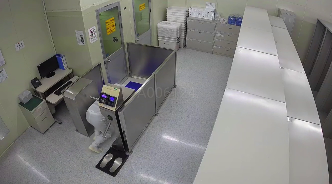

frame No: 30


In [21]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

# 設定要讀取的視頻文件路徑
video_path = "entrance_mo.mp4"

# 使用 OpenCV 讀取視頻
cap = cv2.VideoCapture(video_path)

# 檢查是否成功打開視頻文件
if not cap.isOpened():
    print("無法開啟視頻文件")
else:
    frameNo =1
    while cap.isOpened():
        # 逐幀讀取視頻
        ret, frame = cap.read()
        frameNo +=1
        if(frameNo > 30):
          break
        # 如果成功讀取到幀
        if ret:
            # 清除先前顯示的幀
            clear_output(wait=True)

            # 縮小顯示大小，比如設置為原來的 25%
            resized_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

            # 顯示當前幀
            cv2_imshow(resized_frame)
            print("frame No:", frameNo)

            # 控制播放速度 (例如每秒25幀)
            time.sleep(0.08)  # 0.04 秒大約等於 25 fps
        else:
            # 如果無法讀取到幀，則結束循環
            break

# 釋放視頻對象
cap.release()

# 關閉所有窗口
cv2.destroyAllWindows()


In [28]:
def process_frame(frame):
  # 處理影像和文字
  inputs = processor.process(
      images=[frame],
      text="Describe what action the person is doing in this image."
  )

  # move inputs to the correct device and make a batch of size 1
  inputs = {k: v.to(model.device).unsqueeze(0) for k, v in inputs.items()}

  # generate output; maximum 50 new tokens; stop generation when <|endoftext|> is generated
  output = model.generate_from_batch(
    inputs,
    GenerationConfig(max_new_tokens=50, stop_strings="<|endoftext|>"),
    tokenizer=processor.tokenizer
  )

  # only get generated tokens; decode them to text
  generated_tokens = output[0,inputs['input_ids'].size(1):]
  generated_text = processor.tokenizer.decode(generated_tokens, skip_special_tokens=True)

  # return the generated text
  return generated_text

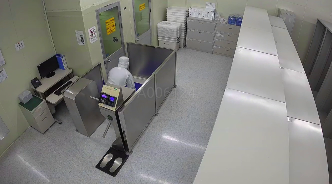

frame No: 40
 The person in the image is going through a metal detector. They are standing in
a red carpeted area within a metal detector booth, which is typically used for
security purposes in various settings like airports, government buildings, or
large events. The individual is


In [29]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time
import textwrap

# 設定要讀取的視頻文件路徑
video_path = "entrance_mo.mp4"

# 使用 OpenCV 讀取視頻
cap = cv2.VideoCapture(video_path)

# 檢查是否成功打開視頻文件
if not cap.isOpened():
    print("無法開啟視頻文件")
else:
    frameNo =1
    while cap.isOpened():
        # 逐幀讀取視頻
        ret, frame = cap.read()
        frameNo +=1
        if(frameNo%10==0): #process every xx frames
          # 如果成功讀取到幀
          if ret:
              generated_text = process_frame(frame)

              # 清除先前顯示的幀
              clear_output(wait=True)

              # 縮小顯示大小，比如設置為原來的 25%
              resized_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

              # 顯示當前幀
              cv2_imshow(resized_frame)
              print("frame No:", frameNo)

              # 使用 textwrap.fill 將長文本格式化為每行最多 80 個字元
              wrapped_text = textwrap.fill(generated_text, width=80)

              # 打印格式化後的文本
              print(wrapped_text)
          else:
              # 如果無法讀取到幀，則結束循環
              break

# 釋放視頻對象
cap.release()

# 關閉所有窗口
cv2.destroyAllWindows()